In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [23]:
# Read the dataset
Data = pd.read_csv('Add_sales_data_2018.csv')
Data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [7]:
# Displaying no. of rows and columns in the dataset
Data.shape

(205, 7)

In [8]:
# Display the data types
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [10]:
# Checking the null values using isnull() function 
Data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

array([[<AxesSubplot:title={'center':'Add1(in Thousands)'}>,
        <AxesSubplot:title={'center':'Add2(in Thousands)'}>],
       [<AxesSubplot:title={'center':'Add3(in Thousands)'}>,
        <AxesSubplot:title={'center':'Add4(in Thousands)'}>],
       [<AxesSubplot:title={'center':'Add5(in Thousands)'}>,
        <AxesSubplot:title={'center':'Profit(in Thousands)'}>]],
      dtype=object)

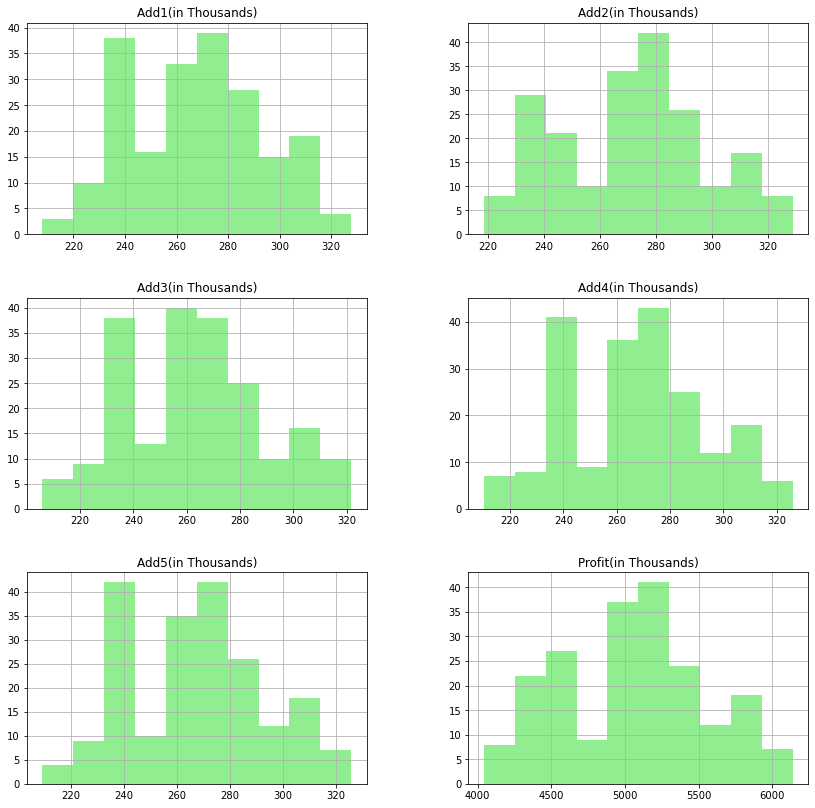

In [24]:
# Plotting the data to see the distribution
Data.hist(figsize=(14,14), color= 'lightgreen')

# 1. Are there any relationship between the amount spent for advertising through five different companies and profit generated ?

<AxesSubplot:>

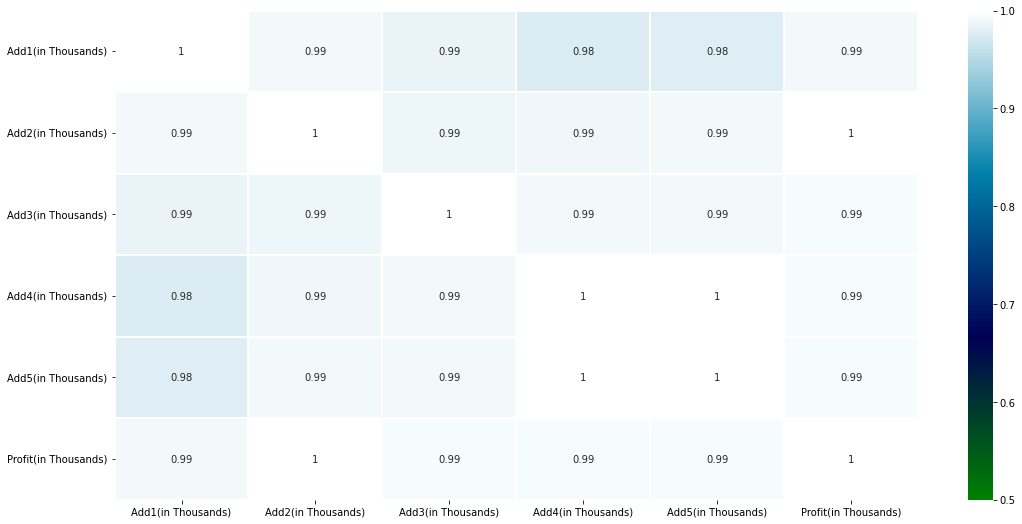

In [29]:
# Checking the relationship between the variables using correlation 
corrmatrix = Data.corr()
plt.subplots(figsize=(18,9))
sns.heatmap(corrmatrix, vmin=0.5, vmax=1, annot= True, linewidth= 0.2, cmap='ocean')

Variables are highly correlated among themselves and has a great influence in determining the profit margins

# 2. Build a regression model to predict the profit from the given data and comment your findings on it

In [31]:
# Taking profit as dependent variable y and Ad amount by different channels as x values or the independent variables
y = Data['Profit(in Thousands)']
x = Data[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']]

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 42, test_size= 0.25)

lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

In [18]:
# Checking the Mean Squared Error (MSE)
predictions = model.predict(x_test)
print('MSE is: %0.3f'% mean_squared_error(y_test, predictions))

MSE is: 0.000


MSE is 0 and the model is a best fit


In [32]:
print('The intercept value of the model is %0.3f'% model.intercept_)

The intercept value of the model is 0.000


In [20]:
print('The coefficient values of Add1(in Thousands), Add2(in Thousands), Add3(in Thousands), Add4(in Thousands), Add5(in Thousands) are as follows: \n',model.coef_)

The coefficient values of Add1(in Thousands), Add2(in Thousands), Add3(in Thousands), Add4(in Thousands), Add5(in Thousands) are as follows: 
 [ 1.   12.38  3.5   1.    0.9 ]


The coefficient of the Add2 is the highest among the others. Profit margin increases by 12 times by spending on 2nd Ad channel.
  

In [33]:
# Checking the r square value
lr.score(x_test, y_test)

1.0

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement

In [22]:
# Predicting the profit based on the given data
New_Data = np.array([[290, 312, 309, 298, 320]])
lr.predict(New_Data)

array([5820.06])

The Profit of the company based on new spendings would be 5820.06